In [1]:
%matplotlib inline
from string import ascii_letters
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("aps_failure_set.csv")

In [3]:
dataset.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,na,2130706432,156,0,0,0,0,0,...,627610,376028,931828,1035236,674626,161266,3284,0,0,0
59991,neg,39308,na,452,374,0,0,0,0,0,...,312426,161694,323438,292350,250112,157636,234932,9506,0,0
59992,neg,14,0,2,2,0,0,0,0,0,...,132,44,80,52,54,0,0,0,0,0
59993,neg,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.shape

(60000, 171)

In [5]:
dataset.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 171 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    class   object
 1    aa_000  int64 
 2    ab_000  object
 3    ac_000  object
 4    ad_000  object
 5    ae_000  object
 6    af_000  object
 7    ag_000  object
 8    ag_001  object
 9    ag_002  object
 10   ag_003  object
 11   ag_004  object
 12   ag_005  object
 13   ag_006  object
 14   ag_007  object
 15   ag_008  object
 16   ag_009  object
 17   ah_000  object
 18   ai_000  object
 19   aj_000  object
 20   ak_000  object
 21   al_000  object
 22   am_0    object
 23   an_000  object
 24   ao_000  object
 25   ap_000  object
 26   aq_000  object
 27   ar_000  object
 28   as_000  object
 29   at_000  object
 30   au_000  object
 31   av_000  object
 32   ax_000  object
 33   ay_000  object
 34   ay_001  object
 35   ay_002  object
 36   ay_003  object
 37   ay_004  object
 38   ay_005  object
 39   ay_006  object
 40   ay

In [6]:
dataset.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

In [7]:
dataset["class"].unique()

array(['neg', 'pos'], dtype=object)

In [8]:
dataset["ad_000"].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [9]:
# column_list = dataset.columns.values.tolist()
# for column_name in column_list:
#      print(dataset[column_name].unique())

In [10]:
miss_val_formats = ["n.a.", "?", "NA", "n/a", "na", "--"]
new_dataset = pd.read_csv("aps_failure_set.csv", na_values = miss_val_formats)

In [11]:
new_dataset.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,NaN,2.130706e+09,156.0,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,neg,39308,NaN,4.520000e+02,374.0,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,neg,14,0.0,2.000000e+00,2.0,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,neg,0,2.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
null_20_columns = new_dataset.isnull().sum().sort_values(ascending=False).head(20)
null_20_columns

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
ch_000    14861
co_000    14861
cg_000    14861
cf_000    14861
ad_000    14861
ct_000    13808
cu_000    13808
cv_000    13808
cx_000    13808
cy_000    13808
dtype: int64

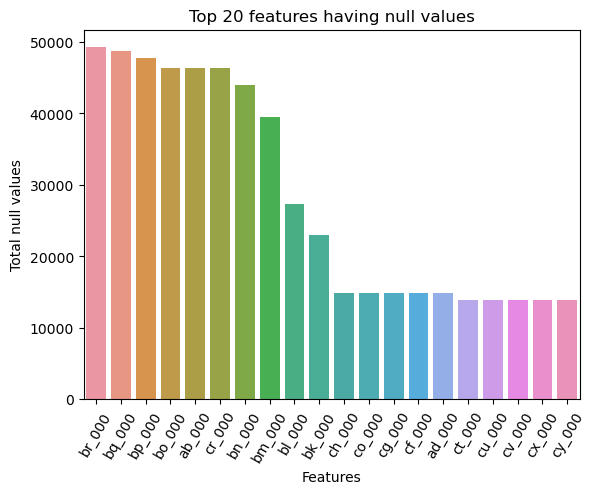

In [26]:
#plotting the top features having nulls
plt.figure()
sns.barplot(y= null_20_columns, x=null_20_columns.index)
plt.xticks(rotation=60)
plt.ylabel("Total null values")
plt.xlabel("Features")
plt.title("Top 20 features having null values")
plt.show()

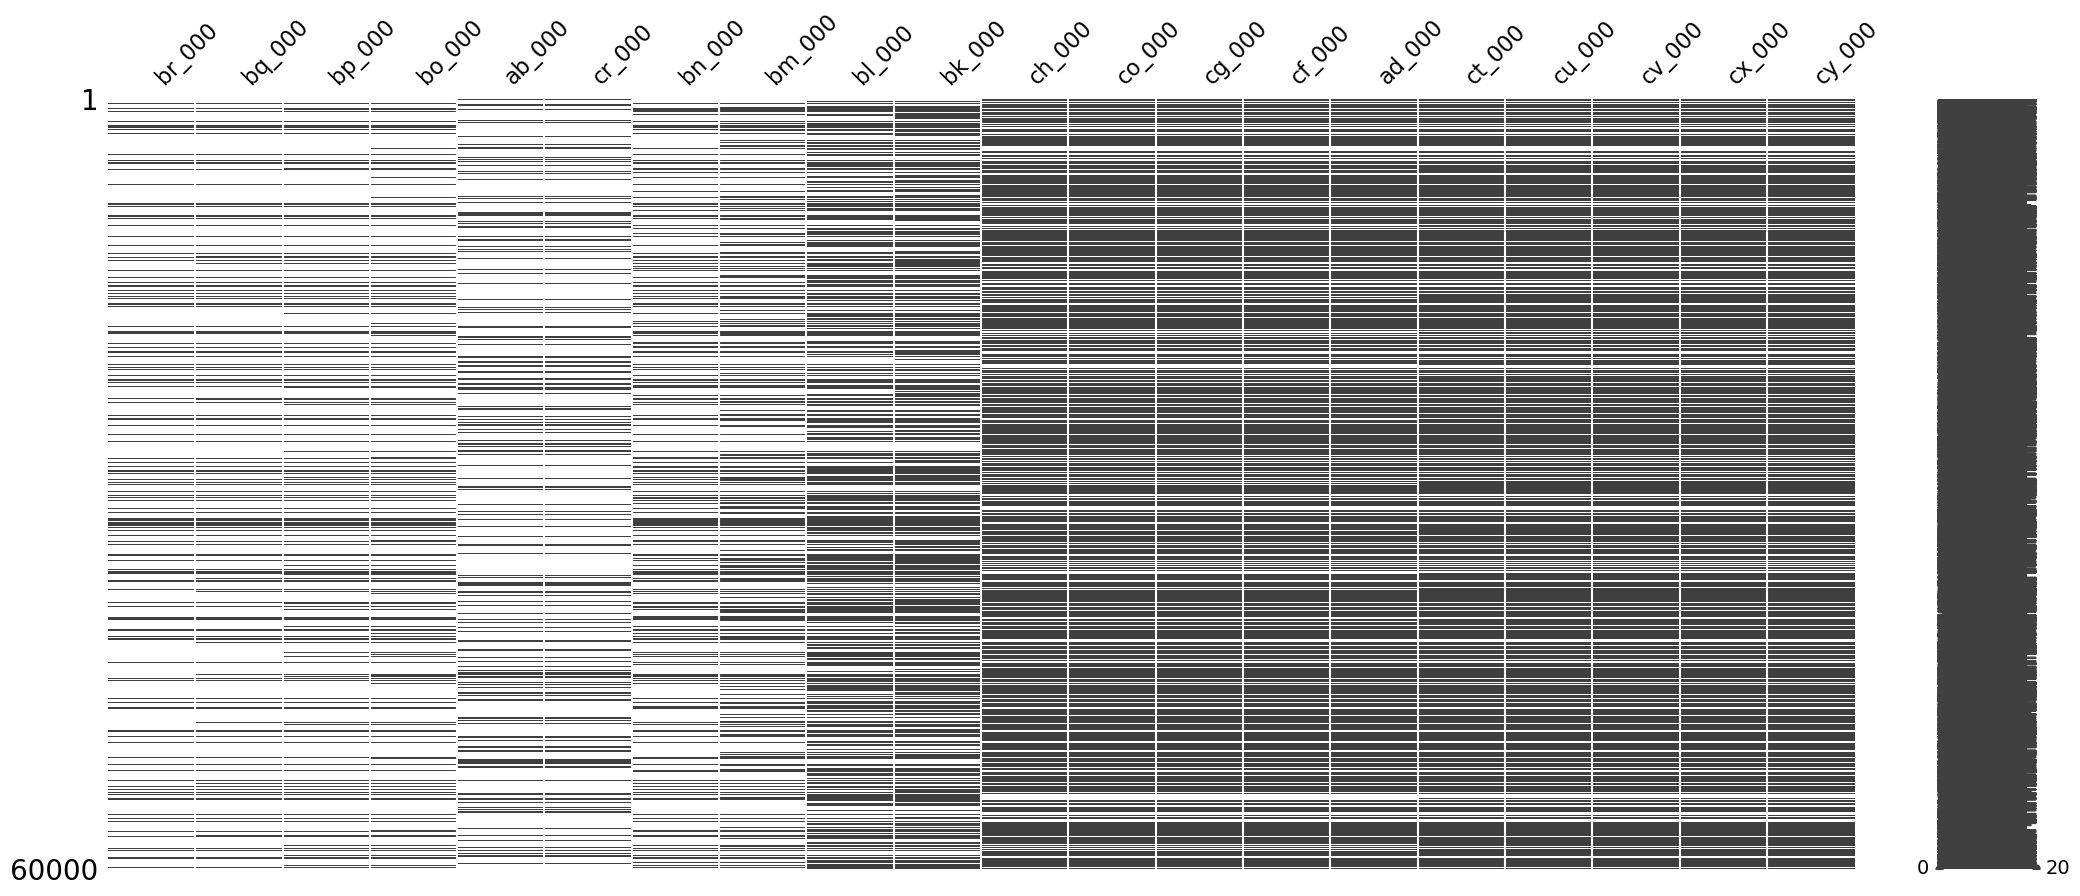

In [29]:
import missingno as msno

ax = msno.matrix(new_dataset[null_20_columns.index])

In [38]:
new_dataset = new_dataset.drop(columns = null_20_columns.index)

In [39]:
new_dataset.shape

(60000, 151)

In [43]:
# Calculating the sparsity of the data
from numpy import count_nonzero

sparsity_of_dataset = 1 - count_nonzero(new_dataset) / new_dataset.size
sparsity_of_dataset

0.34094415011037527

#### 'new_dataset' has %34 sparty of data

In [47]:
# Confirming if data is sparse
from scipy import sparse

sparse.issparse(new_dataset)

False

## Scale the data

<Axes: xlabel='ee_005', ylabel='Count'>

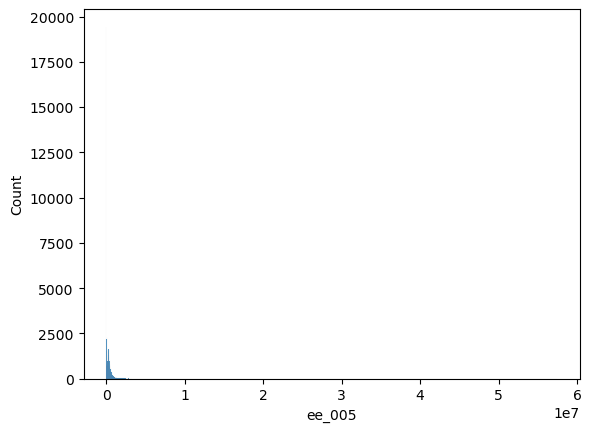

In [58]:
sns.histplot(data = new_dataset, x="ee_005")

In [59]:
# Assigning the independet variables to a new variable X

X = new_dataset.drop("class", axis = 1)

# Assigning the dependent variable to a new variable y

y = new_dataset["class"]

In [61]:
import sklearn.preprocessing as preproc

X = preproc.MinMaxScaler().fit_transform(X)
new_dataset_scaled = pd.DataFrame(X)
new_dataset_scaled.values

array([[2.79250729e-02, 9.99999832e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20361295e-02, 0.00000000e+00, 0.00000000e+00, ...,
        3.93692728e-04, 0.00000000e+00, 0.00000000e+00],
       [1.49423061e-02, 1.07006746e-07, 0.00000000e+00, ...,
        1.34905375e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.07782233e-05, 9.99999829e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.92336170e-02, 9.99999829e-01, 0.00000000e+00, ...,
        1.01945944e-01, 0.00000000e+00, 0.00000000e+00],
       [1.46444794e-02, 3.27590826e-07, 0.00000000e+00, ...,
        4.14689673e-05, 0.00000000e+00, 0.00000000e+00]])

In [62]:
new_dataset_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.027925,9.999998e-01,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,0.007996,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0.012036,0.000000e+00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,0.003646,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0.014942,1.070067e-07,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,0.002068,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0.000004,3.285295e-08,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,0.000018,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0.022164,6.420405e-07,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,0.010975,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


In [18]:
new_dataset.mean()

C:\Users\sertacbattal\AppData\Local\Temp\ipykernel_20848\3589735537.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_dataset.mean()


aa_000    5.933650e+04
ab_000    7.131885e-01
ac_000    3.560143e+08
ad_000    1.906206e+05
ae_000    6.819130e+00
              ...     
ee_007    3.462714e+05
ee_008    1.387300e+05
ee_009    8.388915e+03
ef_000    9.057895e-02
eg_000    2.127556e-01
Length: 170, dtype: float64

In [19]:
new_dataset.fillna(new_dataset.mean(), inplace=True)

C:\Users\sertacbattal\AppData\Local\Temp\ipykernel_20848\791124681.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_dataset.fillna(new_dataset.mean(), inplace=True)


In [21]:
new_dataset.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,neg,81354,0.713189,2.130706e+09,156.000000,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,neg,39308,0.713189,4.520000e+02,374.000000,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,neg,14,0.000000,2.000000e+00,2.000000,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,neg,0,2.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
new_dataset.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,1.660588,7.724678e+08,3.504515e+07,158.142022,205.375337,2.036363e+04,3.400875e+04,1.494791e+05,7.574598e+05,...,1.149060e+06,5.402722e+05,1.161763e+06,1.114758e+06,1.063164e+06,1.718366e+06,4.469894e+05,4.720424e+04,4.268529,8.627929
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.713189,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.713189,1.880000e+02,2.880000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.397270e+05,1.148530e+05,2.283220e+05,1.960600e+05,9.976600e+04,4.358700e+04,4.474000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.713189,1.686000e+03,8.426500e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.454897e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.833455e+05,1.732245e+05,1.387300e+05,2.366000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


<Axes: xlabel='aa_000', ylabel='Count'>

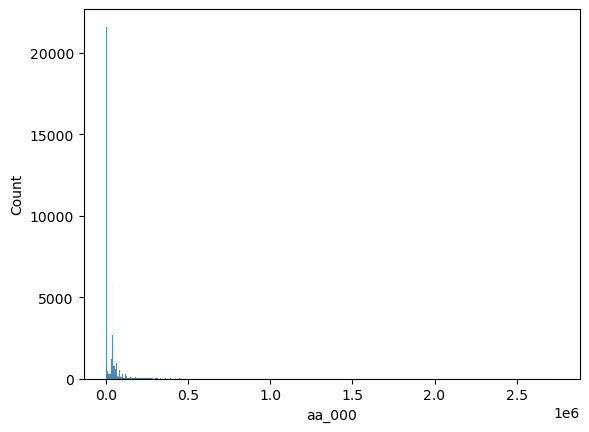

In [23]:
sns.histplot(data = new_dataset, x = "aa_000") 

In [24]:
new_dataset.corr().round(2)

C:\Users\sertacbattal\AppData\Local\Temp\ipykernel_20848\502574347.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_dataset.corr().round(2)


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.00,0.03,-0.02,-0.0,0.05,0.07,0.02,0.14,0.28,0.49,...,0.73,0.74,0.72,0.72,0.72,0.60,0.47,0.25,0.01,0.03
ab_000,0.03,1.00,-0.01,0.0,0.03,0.04,0.00,0.01,0.02,0.03,...,0.02,0.04,0.03,0.03,0.02,0.01,0.00,0.00,0.05,0.10
ac_000,-0.02,-0.01,1.00,-0.0,-0.00,-0.01,0.02,-0.00,-0.01,-0.02,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,0.01,0.02,-0.01,0.01
ad_000,-0.00,0.00,-0.00,1.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
ae_000,0.05,0.03,-0.00,-0.0,1.00,0.82,-0.00,-0.00,0.00,0.02,...,0.01,0.02,0.01,0.03,0.06,0.04,-0.01,-0.01,0.07,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.60,0.01,-0.02,-0.0,0.04,0.05,0.00,0.04,0.18,0.51,...,0.45,0.45,0.44,0.38,0.55,1.00,0.22,0.06,-0.00,0.00
ee_008,0.47,0.00,0.01,-0.0,-0.01,-0.01,-0.00,0.00,0.01,0.02,...,0.45,0.48,0.46,0.41,0.37,0.22,1.00,0.71,-0.01,-0.00
ee_009,0.25,0.00,0.02,-0.0,-0.01,-0.01,-0.00,-0.00,-0.01,-0.02,...,0.23,0.24,0.22,0.19,0.16,0.06,0.71,1.00,-0.00,-0.00
ef_000,0.01,0.05,-0.01,-0.0,0.07,0.11,-0.00,0.00,0.01,0.01,...,0.01,0.01,0.00,0.03,0.01,-0.00,-0.01,-0.00,1.00,0.28


In [25]:
matrix = new_dataset.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

C:\Users\sertacbattal\AppData\Local\Temp\ipykernel_20848\3861761015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = new_dataset.corr().round(2)


In [26]:
# sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, cmap='vlag', mask=mask)

In [44]:
# sns.set_theme(style="white")

# Generate a large random dataset
# d = pd.DataFrame(data=new_dataset,columns=("aa_000","ab_000","ac_000","ad_000","ae_000","af_000","ag_000","ag_001","ag_002","ag_003"))

# Compute the correlation matrix
#corr = d.corrwith(new_dataset["class"])
# corr = d.corr()

# Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

## Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 1})

##### class values change, neg to 0, pos to 1

In [45]:
new_dataset['class'].replace('neg', 0, inplace = True)
new_dataset['class'].replace('pos', 1,  inplace = True)

In [46]:
new_dataset["class"].unique()

array([0, 1], dtype=int64)

In [47]:
new_dataset.corr().round(2)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,1.00,0.54,0.02,-0.03,-0.0,0.01,0.02,0.01,0.19,0.34,...,0.44,0.43,0.42,0.49,0.42,0.16,0.24,0.12,0.01,0.01
aa_000,0.54,1.00,0.03,-0.02,-0.0,0.05,0.07,0.02,0.14,0.28,...,0.73,0.74,0.72,0.72,0.72,0.60,0.47,0.25,0.01,0.03
ab_000,0.02,0.03,1.00,-0.01,0.0,0.03,0.04,0.00,0.01,0.02,...,0.02,0.04,0.03,0.03,0.02,0.01,0.00,0.00,0.05,0.10
ac_000,-0.03,-0.02,-0.01,1.00,-0.0,-0.00,-0.01,0.02,-0.00,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,0.01,0.02,-0.01,0.01
ad_000,-0.00,-0.00,0.00,-0.00,1.0,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.16,0.60,0.01,-0.02,-0.0,0.04,0.05,0.00,0.04,0.18,...,0.45,0.45,0.44,0.38,0.55,1.00,0.22,0.06,-0.00,0.00
ee_008,0.24,0.47,0.00,0.01,-0.0,-0.01,-0.01,-0.00,0.00,0.01,...,0.45,0.48,0.46,0.41,0.37,0.22,1.00,0.71,-0.01,-0.00
ee_009,0.12,0.25,0.00,0.02,-0.0,-0.01,-0.01,-0.00,-0.00,-0.01,...,0.23,0.24,0.22,0.19,0.16,0.06,0.71,1.00,-0.00,-0.00
ef_000,0.01,0.01,0.05,-0.01,-0.0,0.07,0.11,-0.00,0.00,0.01,...,0.01,0.01,0.00,0.03,0.01,-0.00,-0.01,-0.00,1.00,0.28


<Axes: >

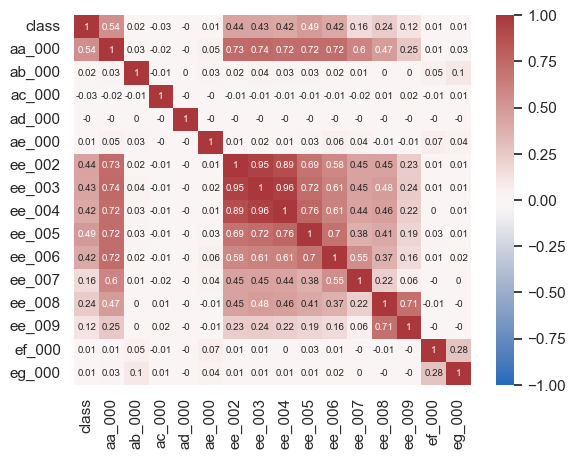

In [48]:
d = pd.DataFrame(data=new_dataset,columns=("class","aa_000","ab_000","ac_000","ad_000","ae_000","ee_002","ee_003","ee_004","ee_005","ee_006","ee_007","ee_008","ee_009","ef_000","eg_000"))
sns.heatmap(d.corr().round(2), annot=True, vmin=-1, vmax=1, center=0, cmap='vlag', annot_kws={'fontsize':7})

In [50]:
new_dataset['class'].replace('neg', 0, inplace = True)
new_dataset['class'].replace('pos', 1,  inplace = True)

In [51]:
new_dataset.head(-5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,81354,0.713189,2.130706e+09,156.000000,0.0,0.0,0.0,0.0,0.0,...,627610.0,376028.0,931828.0,1035236.0,674626.0,161266.0,3284.0,0.0,0.0,0.0
59991,0,39308,0.713189,4.520000e+02,374.000000,0.0,0.0,0.0,0.0,0.0,...,312426.0,161694.0,323438.0,292350.0,250112.0,157636.0,234932.0,9506.0,0.0,0.0
59992,0,14,0.000000,2.000000e+00,2.000000,0.0,0.0,0.0,0.0,0.0,...,132.0,44.0,80.0,52.0,54.0,0.0,0.0,0.0,0.0,0.0
59993,0,0,2.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### implementation PCA

In [52]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'cumulative explained variance')

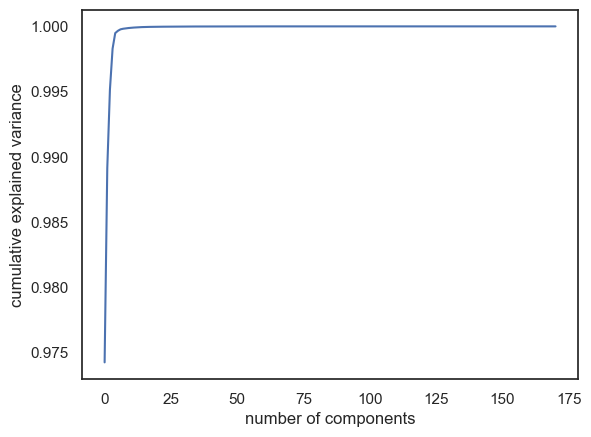

In [53]:
new_dataset_no_label = new_dataset.drop(new_dataset["class"])
pca = PCA().fit(new_dataset_no_label)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")

In [54]:
pca = PCA(10)
projected = pca.fit_transform(new_dataset_no_label)

In [55]:
projected.shape

(59998, 10)

In [74]:
pca.explained_variance_

array([5.96679879e+17, 9.12345987e+15, 3.68459552e+15, 1.92723746e+15,
       7.30884185e+14, 1.06964184e+14, 7.01946691e+13, 2.76642936e+13,
       1.77999137e+13, 1.53625359e+13])

In [56]:
new_dataset_pca = pd.DataFrame(projected, columns = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])

In [57]:
new_dataset_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,-3.559699e+08,-5.284379e+06,-379046.725142,-1.088633e+07,-6.359373e+05,-1.554075e+06,7.566484e+05,-322655.097945,-988869.615099,3.792877e+05
1,-3.559609e+08,-5.950935e+06,-368961.856917,-1.555965e+07,-8.003233e+06,-8.509215e+05,1.639228e+05,-410900.468405,968325.581012,-1.489089e+06
2,-3.560217e+08,-4.463435e+06,-405990.705092,9.376618e+06,-4.792563e+06,-2.766303e+06,1.847643e+06,320225.057623,692804.225317,1.278805e+06
3,1.774750e+09,-4.283088e+06,-1421.711062,-5.724222e+06,-1.862559e+05,2.460854e+06,-3.451241e+05,330713.924095,440579.952481,3.197366e+05
4,-3.559609e+08,-5.923970e+06,-39701.544229,-1.544512e+07,-7.844070e+06,-1.004117e+06,1.762139e+05,862904.709977,-318498.665137,4.086033e+05


In [58]:
new_dataset_pca['class'] = new_dataset["class"]

In [59]:
new_dataset_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,class
0,-3.559699e+08,-5.284379e+06,-379046.725142,-1.088633e+07,-6.359373e+05,-1.554075e+06,7.566484e+05,-322655.097945,-988869.615099,3.792877e+05,0
1,-3.559609e+08,-5.950935e+06,-368961.856917,-1.555965e+07,-8.003233e+06,-8.509215e+05,1.639228e+05,-410900.468405,968325.581012,-1.489089e+06,0
2,-3.560217e+08,-4.463435e+06,-405990.705092,9.376618e+06,-4.792563e+06,-2.766303e+06,1.847643e+06,320225.057623,692804.225317,1.278805e+06,0
3,1.774750e+09,-4.283088e+06,-1421.711062,-5.724222e+06,-1.862559e+05,2.460854e+06,-3.451241e+05,330713.924095,440579.952481,3.197366e+05,0
4,-3.559609e+08,-5.923970e+06,-39701.544229,-1.544512e+07,-7.844070e+06,-1.004117e+06,1.762139e+05,862904.709977,-318498.665137,4.086033e+05,0


In [60]:
new_dataset_array = new_dataset_pca.values

In [61]:
from sklearn.model_selection import train_test_split

X = new_dataset_array[:,0:10]
y = new_dataset_array[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [62]:
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [63]:
models=[]
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))   
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [64]:
results = []
names = []
for name, model in models:
    kflod = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kflod, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name,cv_results.mean(), cv_results.std()))

LR: 0.822805 (0.140360)
LDA: 0.983353 (0.000021)
KNN: 0.983333 (0.000042)
CART: 0.965457 (0.001250)
NB: 0.505021 (0.459311)
SVM: 0.983374 (0.000000)


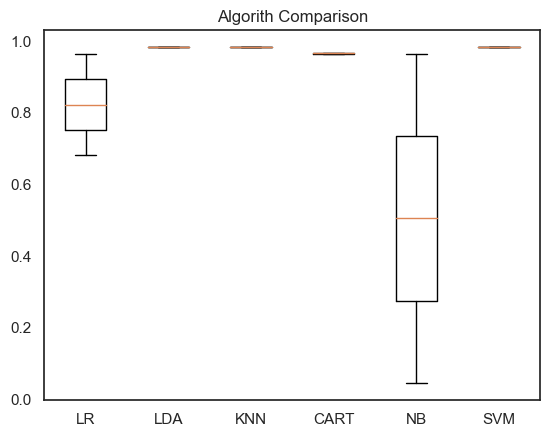

In [65]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorith Comparison')
pyplot.show()

In [66]:
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [67]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.66775
[[7944 3853]
 [ 134   69]]
